## Worked example 2 "Understanding data"

In [2]:
import pandas as pd
import glob
import os
os.getcwd()


'/Users/anshulsingh/Downloads'

In [3]:
import os
import pandas as pd


directory_path = '/Users/anshulsingh/Downloads/Worked_example_2'


csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]


combined_df = pd.DataFrame()


for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)
    combined_df = combined_df.append(df, ignore_index=True)


print(combined_df)

             asin                                      product_title  \
0      B07N46LTJJ  ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...   
1      B07N46LTJJ  ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...   
2      B07N46LTJJ  ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...   
3      B07N46LTJJ  ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...   
4      B07N46LTJJ  ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...   
...           ...                                                ...   
15905  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   
15906  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   
15907  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   
15908  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   
15909  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   

       average_rating  total_reviews    review_author author_badge  \
0                 4.5           1316             Erin          Na

/var/folders/b3/8bjyb_v57mqfb_p538w1tx5w0000gn/T/ipykernel_84556/336445815.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
/var/folders/b3/8bjyb_v57mqfb_p538w1tx5w0000gn/T/ipykernel_84556/336445815.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
/var/folders/b3/8bjyb_v57mqfb_p538w1tx5w0000gn/T/ipykernel_84556/336445815.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
/var/folders/b3/8bjyb_v57mqfb_p538w1tx5w0000gn/T/ipykernel_84556/336445815.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [4]:

df = combined_df

columns_to_drop = ['asin', 'review_author', 'author_badge','badge', 'reviewed_product_attribute', 'reviewed_variant_asin',
                  'variant_review_url', 'review_comment_count', 'author_profile_url','url', 'review_url', 'input']
df = df.drop(columns=columns_to_drop, axis=1)

columns_to_replace = ['no_of_people_reacted_helpful']  
df[columns_to_replace] = df[columns_to_replace].fillna(0)


df['dose'] = df['product_title'].str.extract(r'\b(\d+)\s*mg\b', expand=False)


df['dose'] = pd.to_numeric(df['dose'], errors='coerce')

df = df.dropna(subset=['dose'])



df['dose'].unique()


array([ 1., 10., 12., 20.])

In [5]:
df

,product_title,average_rating,total_reviews,review_rating,review_date,reviewed_country,review_text,review_header,no_of_people_reacted_helpful,brand,dose
0,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,2,3-Feb-22,United States,I managed to force down a couple of gummies an...,Bad taste,0,ZzzQuil,1.0
1,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,3,1-Aug-21,United States,I’ve heard so many good things about this prod...,"Works for my sister, but not for me. Plus it c...",9.0,ZzzQuil,1.0
2,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,1,17-Aug-21,United States,"The first ingredients are ""Corn syrup, water a...",Sickeningly sweet - loaded with sugar,0,ZzzQuil,1.0
3,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,5,16-Sep-20,United States,Product works! End up getting sleepy like boo ...,Actually works!,0,ZzzQuil,1.0
4,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,5,8-Dec-20,United States,You go to sleep very quickly!,Works great,0,ZzzQuil,1.0
...,...,...,...,...,...,...,...,...,...,...,...
15905,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,5,20-Oct-21,United States,BEST YET 20 MG FALL ASLEEP LESS THAN 30 MINUTE...,SLEEP EASY,1.0,Vitamatic,20.0
15906,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,5,20-May-21,United States,I was recommended melatonin by my Doctor. I be...,Performed well,0,Vitamatic,20.0
15907,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,5,17-Dec-20,United States,Highest mg ratings for lowest $ amount and tas...,More Mg less $,0,Vitamatic,20.0
15908,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,2,7-Apr-22,United States,"The initial taste wasn’t too bad, but the long...",Yuck!,0,Vitamatic,20.0


In [6]:

df['review_rating'] = pd.to_numeric(df['review_rating'], errors='coerce')

rating_summary = df.groupby('dose')['review_rating'].agg(['mean', 'median', 'std', 'count'])

df['Sentiment'] = df['review_rating'].apply(lambda x: 1 if x > 3 else (2 if x == 3 else 0))
df['Sentiment_Name'] = df['review_rating'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))


print(rating_summary)


          mean  median       std  count
dose                                   
1.0   3.896923     5.0  1.550829   1300
10.0  4.252688     5.0  1.308681   4650
12.0  4.235764     5.0  1.306869   5760
20.0  3.985000     5.0  1.507663   1000


In [7]:
df['dose'].unique()

array([ 1., 10., 12., 20.])

In [8]:
df = df.replace(',', '', regex=True)

In [9]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


nltk.download('punkt')
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))


def clean_text(text):
    if not pd.isnull(text):
        tokens = word_tokenize(text.lower())
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return filtered_tokens
    return []

df['cleaned_review_text'] = df['review_text'].apply(clean_text)
print(df['cleaned_review_text'])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anshulsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anshulsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [managed, force, couple, gummies, got, sleep, ...
1        [heard, many, good, things, product, try, inso...
2        [first, ingredients, corn, syrup, water, sugar...
3        [product, works, end, getting, sleepy, like, b...
4                                     [go, sleep, quickly]
                               ...                        
15905    [best, yet, mg, fall, asleep, less, minutes, m...
15906    [recommended, melatonin, doctor, believe, prod...
15907    [highest, mg, ratings, lowest, amount, taste, ...
15908    [initial, taste, bad, longer, took, dissolve, ...
15909                                     [great, product]
Name: cleaned_review_text, Length: 12710, dtype: object


In [10]:
df

,product_title,average_rating,total_reviews,review_rating,review_date,reviewed_country,review_text,review_header,no_of_people_reacted_helpful,brand,dose,Sentiment,Sentiment_Name,cleaned_review_text
0,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,2,3-Feb-22,United States,I managed to force down a couple of gummies an...,Bad taste,0,ZzzQuil,1.0,0,Negative,"[managed, force, couple, gummies, got, sleep, ..."
1,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,3,1-Aug-21,United States,I’ve heard so many good things about this prod...,Works for my sister but not for me. Plus it co...,9.0,ZzzQuil,1.0,2,Neutral,"[heard, many, good, things, product, try, inso..."
2,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,1,17-Aug-21,United States,"The first ingredients are ""Corn syrup water an...",Sickeningly sweet - loaded with sugar,0,ZzzQuil,1.0,0,Negative,"[first, ingredients, corn, syrup, water, sugar..."
3,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,5,16-Sep-20,United States,Product works! End up getting sleepy like boo ...,Actually works!,0,ZzzQuil,1.0,1,Positive,"[product, works, end, getting, sleepy, like, b..."
4,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,5,8-Dec-20,United States,You go to sleep very quickly!,Works great,0,ZzzQuil,1.0,1,Positive,"[go, sleep, quickly]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,Vitamatic Melatonin 20mg Tablets | Vegetarian ...,4.5,1033,5,20-Oct-21,United States,BEST YET 20 MG FALL ASLEEP LESS THAN 30 MINUTE...,SLEEP EASY,1.0,Vitamatic,20.0,1,Positive,"[best, yet, mg, fall, asleep, less, minutes, m..."
15906,Vitamatic Melatonin 20mg Tablets | Vegetarian ...,4.5,1033,5,20-May-21,United States,I was recommended melatonin by my Doctor. I be...,Performed well,0,Vitamatic,20.0,1,Positive,"[recommended, melatonin, doctor, believe, prod..."
15907,Vitamatic Melatonin 20mg Tablets | Vegetarian ...,4.5,1033,5,17-Dec-20,United States,Highest mg ratings for lowest $ amount and tas...,More Mg less $,0,Vitamatic,20.0,1,Positive,"[highest, mg, ratings, lowest, amount, taste, ..."
15908,Vitamatic Melatonin 20mg Tablets | Vegetarian ...,4.5,1033,2,7-Apr-22,United States,The initial taste wasn’t too bad but the longe...,Yuck!,0,Vitamatic,20.0,0,Negative,"[initial, taste, bad, longer, took, dissolve, ..."


In [11]:
df['dose'].isna().sum()


0

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


df['cleaned_review_text_joined'] = df['cleaned_review_text'].apply(' '.join)


vectorizer = TfidfVectorizer(max_features=100)  # You can adjust the number of features
tfidf_matrix = vectorizer.fit_transform(df['cleaned_review_text_joined'])


feature_names = vectorizer.get_feature_names_out()
feature_names

array(['also', 'asleep', 'back', 'bad', 'bed', 'best', 'better', 'bottle',
       'bought', 'brand', 'brands', 'buy', 'could', 'day', 'definitely',
       'different', 'dissolve', 'dose', 'easy', 'even', 'every', 'fall',
       'falling', 'fast', 'feel', 'feeling', 'first', 'flavor', 'get',
       'getting', 'give', 'go', 'good', 'got', 'great', 'groggy',
       'gummies', 'gummy', 'half', 'hard', 'help', 'helps', 'hour',
       'hours', 'like', 'little', 'love', 'make', 'melatonin', 'mg',
       'minutes', 'morning', 'much', 'need', 'never', 'next', 'night',
       'nights', 'one', 'pill', 'pills', 'price', 'product', 'quality',
       'quickly', 'really', 'recommend', 'sleep', 'sleeping', 'sleepy',
       'something', 'stay', 'still', 'sure', 'tablets', 'take', 'taking',
       'taste', 'tastes', 'think', 'time', 'times', 'took', 'tried',
       'trouble', 'try', 'two', 'use', 'used', 'using', 'usually', 'wake',
       'well', 'within', 'without', 'work', 'worked', 'works', 'would',


In [13]:
# Group by 'dose' and analyze
grouped = df.groupby('dose')

for name, group in grouped:
    
    tfidf_matrix_group = vectorizer.transform(group['cleaned_review_text_joined'])

In [14]:
from nltk.corpus import sentiwordnet as swn
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anshulsingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
positive_words = []
negative_words = []
neutral_words = []

for word in feature_names:
    synsets = list(swn.senti_synsets(word))
    if not synsets:
        continue
    # Take the first sense of the word for simplicity
    synset = synsets[0]
    if synset.pos_score() > synset.neg_score() and synset.pos_score() > synset.obj_score():
        positive_words.append(word)
    elif synset.neg_score() > synset.pos_score() and synset.neg_score() > synset.obj_score():
        negative_words.append(word)
    else:
        neutral_words.append(word)


In [16]:
positive_words

['different', 'easy', 'love', 'really']

In [17]:
negative_words

['bad', 'hard', 'never', 'sure']

In [18]:
neutral_words

['also',
 'asleep',
 'back',
 'bed',
 'best',
 'better',
 'bottle',
 'bought',
 'brand',
 'brands',
 'buy',
 'day',
 'definitely',
 'dissolve',
 'dose',
 'even',
 'every',
 'fall',
 'falling',
 'fast',
 'feel',
 'feeling',
 'first',
 'flavor',
 'get',
 'getting',
 'give',
 'go',
 'good',
 'got',
 'great',
 'groggy',
 'gummy',
 'half',
 'help',
 'helps',
 'hour',
 'hours',
 'like',
 'little',
 'make',
 'melatonin',
 'mg',
 'minutes',
 'morning',
 'much',
 'need',
 'next',
 'night',
 'nights',
 'one',
 'pill',
 'pills',
 'price',
 'product',
 'quality',
 'quickly',
 'recommend',
 'sleep',
 'sleeping',
 'sleepy',
 'stay',
 'still',
 'tablets',
 'take',
 'taking',
 'taste',
 'tastes',
 'think',
 'time',
 'times',
 'took',
 'tried',
 'trouble',
 'try',
 'two',
 'use',
 'used',
 'using',
 'usually',
 'wake',
 'well',
 'within',
 'work',
 'worked',
 'works',
 'years']

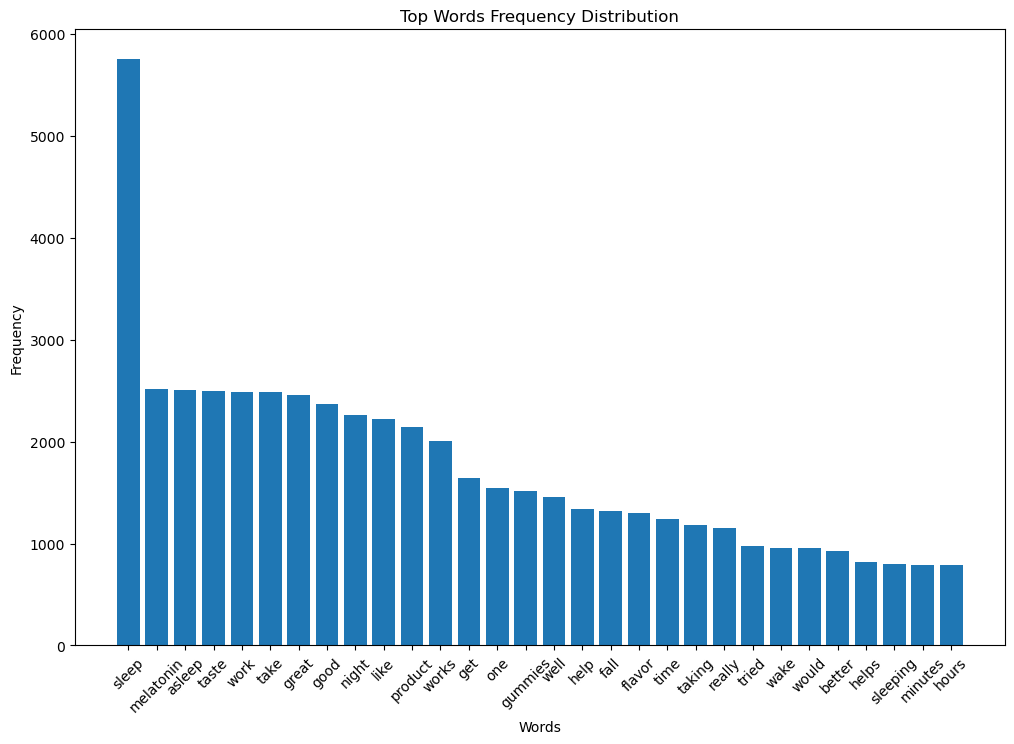

In [19]:
import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist


all_words = [word for text in df['cleaned_review_text'] for word in text]


freq_dist = FreqDist(all_words)


n = 30  # You can change this number as needed
most_common_words = freq_dist.most_common(n)

# Unzip the words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies)
plt.xticks(rotation=45)  # Rotate the word labels for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words Frequency Distribution')
plt.show()


In [20]:
from collections import Counter

cleaned_text = [word for sublist in df['cleaned_review_text'] for word in sublist]


word_frequencies = Counter(cleaned_text)
top_100_words = word_frequencies.most_common(100)

In [21]:
def generate_tag_cloud_html(top_words, max_font_size=60, min_font_size=10):
    max_frequency = max([freq for word, freq in top_words])
    html = "<div style='word-wrap: break-word;'>"

    for word, freq in top_words:
        font_size = (freq / max_frequency) * (max_font_size - min_font_size) + min_font_size
        html += f"<span style='font-size: {font_size}px;'>{word} </span>"

    html += "</div>"
    return html


In [22]:
from IPython.display import HTML


tag_cloud_html = generate_tag_cloud_html(top_100_words)
HTML(tag_cloud_html)


In [23]:
import pandas as pd
from collections import Counter




grouped_by_dose = df.groupby('dose')


for dose, group in grouped_by_dose:
    
    all_words = [word for text in group['cleaned_review_text'] for word in text]
    
   
    word_freq = Counter(all_words)

    
    relevant_words = ['effective', 'no effect', 'side effect', 'good', 'bad', 'satisfied']
    relevant_freq = {word: word_freq[word] for word in relevant_words if word in word_freq}

    
    print(f"Dose: {dose}")
    print(relevant_freq)


Dose: 1.0
{'effective': 32, 'good': 226, 'bad': 60, 'satisfied': 1}
Dose: 10.0
{'effective': 121, 'good': 985, 'bad': 189, 'satisfied': 15}
Dose: 12.0
{'effective': 165, 'good': 1002, 'bad': 203, 'satisfied': 29}
Dose: 20.0
{'effective': 14, 'good': 157, 'bad': 25, 'satisfied': 2}


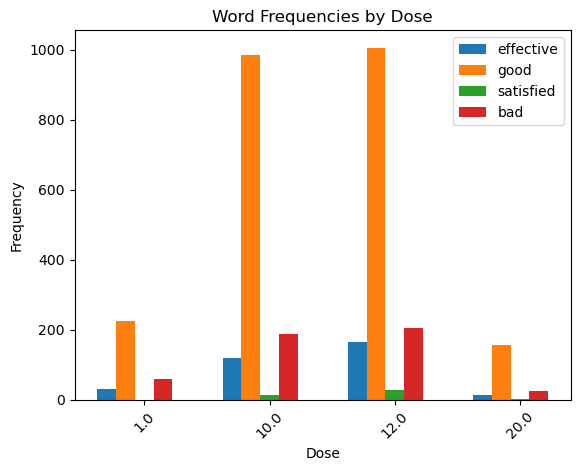

In [24]:
import matplotlib.pyplot as plt
import numpy as np
relevant_freq = {
    1.0: {'effective': 32, 'good': 226, 'bad': 60, 'satisfied': 1},
    10.0: {'effective': 121, 'good': 985, 'bad': 189, 'satisfied': 15},
    12.0: {'effective': 165, 'good': 1005, 'bad': 204, 'satisfied': 29},
    20.0: {'effective': 14, 'good': 158, 'bad': 25, 'satisfied': 2}
    # ... other doses
}


doses = list(relevant_freq.keys())
words = list(set(word for freqs in relevant_freq.values() for word in freqs))


freqs = [[relevant_freq[dose].get(word, 0) for word in words] for dose in doses]


freqs = np.array(freqs)


n_groups = len(words)
bar_width = 0.15  


fig, ax = plt.subplots()

for i, word in enumerate(words):
    index = np.arange(len(doses)) + bar_width * i
    ax.bar(index, freqs[:, i], bar_width, label=word)


ax.set_xlabel('Dose')
ax.set_ylabel('Frequency')
ax.set_title('Word Frequencies by Dose')
ax.set_xticks(np.arange(len(doses)) + bar_width * len(words) / 2)
ax.set_xticklabels(doses)
ax.legend()


plt.xticks(rotation=45)

plt.show()


In [25]:
df

,product_title,average_rating,total_reviews,review_rating,review_date,reviewed_country,review_text,review_header,no_of_people_reacted_helpful,brand,dose,Sentiment,Sentiment_Name,cleaned_review_text,cleaned_review_text_joined
0,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,2,3-Feb-22,United States,I managed to force down a couple of gummies an...,Bad taste,0,ZzzQuil,1.0,0,Negative,"[managed, force, couple, gummies, got, sleep, ...",managed force couple gummies got sleep taste l...
1,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,3,1-Aug-21,United States,I’ve heard so many good things about this prod...,Works for my sister but not for me. Plus it co...,9.0,ZzzQuil,1.0,2,Neutral,"[heard, many, good, things, product, try, inso...",heard many good things product try insomnia si...
2,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,1,17-Aug-21,United States,"The first ingredients are ""Corn syrup water an...",Sickeningly sweet - loaded with sugar,0,ZzzQuil,1.0,0,Negative,"[first, ingredients, corn, syrup, water, sugar...",first ingredients corn syrup water sugar cover...
3,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,5,16-Sep-20,United States,Product works! End up getting sleepy like boo ...,Actually works!,0,ZzzQuil,1.0,1,Positive,"[product, works, end, getting, sleepy, like, b...",product works end getting sleepy like boo mons...
4,ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies ...,4.5,1316,5,8-Dec-20,United States,You go to sleep very quickly!,Works great,0,ZzzQuil,1.0,1,Positive,"[go, sleep, quickly]",go sleep quickly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,Vitamatic Melatonin 20mg Tablets | Vegetarian ...,4.5,1033,5,20-Oct-21,United States,BEST YET 20 MG FALL ASLEEP LESS THAN 30 MINUTE...,SLEEP EASY,1.0,Vitamatic,20.0,1,Positive,"[best, yet, mg, fall, asleep, less, minutes, m...",best yet mg fall asleep less minutes morning h...
15906,Vitamatic Melatonin 20mg Tablets | Vegetarian ...,4.5,1033,5,20-May-21,United States,I was recommended melatonin by my Doctor. I be...,Performed well,0,Vitamatic,20.0,1,Positive,"[recommended, melatonin, doctor, believe, prod...",recommended melatonin doctor believe product h...
15907,Vitamatic Melatonin 20mg Tablets | Vegetarian ...,4.5,1033,5,17-Dec-20,United States,Highest mg ratings for lowest $ amount and tas...,More Mg less $,0,Vitamatic,20.0,1,Positive,"[highest, mg, ratings, lowest, amount, taste, ...",highest mg ratings lowest amount taste also ex...
15908,Vitamatic Melatonin 20mg Tablets | Vegetarian ...,4.5,1033,2,7-Apr-22,United States,The initial taste wasn’t too bad but the longe...,Yuck!,0,Vitamatic,20.0,0,Negative,"[initial, taste, bad, longer, took, dissolve, ...",initial taste bad longer took dissolve worse t...


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = df[['average_rating', 'total_reviews', 'review_rating', 'no_of_people_reacted_helpful','dose']]
y = df['Sentiment'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.svm import SVC


svm_model = SVC()


svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)


svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='macro')
svm_recall = recall_score(y_test, y_pred_svm, average='macro')
svm_f1_score = f1_score(y_test, y_pred_svm, average='macro')


/Users/anshulsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='macro')
knn_recall = recall_score(y_test, y_pred_knn, average='macro')
knn_f1_score = f1_score(y_test, y_pred_knn, average='macro')


In [29]:
knn_accuracy

0.9964594807238395

In [30]:
svm_accuracy

0.7557041699449253

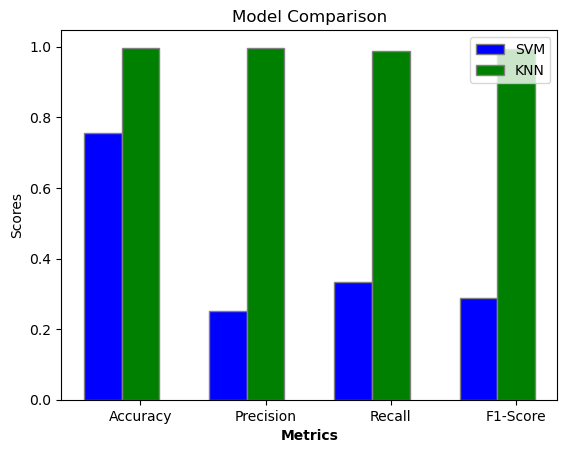

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Scores (replace these with your actual scores)
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1_score]

# Set the positions and width for the bars
barWidth = 0.3
r1 = np.arange(len(svm_scores))
r2 = [x + barWidth for x in r1]

# Create the bar plot
plt.bar(r1, svm_scores, color='blue', width=barWidth, edgecolor='grey', label='SVM')
plt.bar(r2, knn_scores, color='green', width=barWidth, edgecolor='grey', label='KNN')

# Add labels to the plot
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(svm_scores))], ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
plt.ylabel('Scores')
plt.title('Model Comparison')

# Create legend & Show plot
plt.legend()
plt.show()
